# Import the data

In [1]:
from IPython.display import Markdown as md
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts

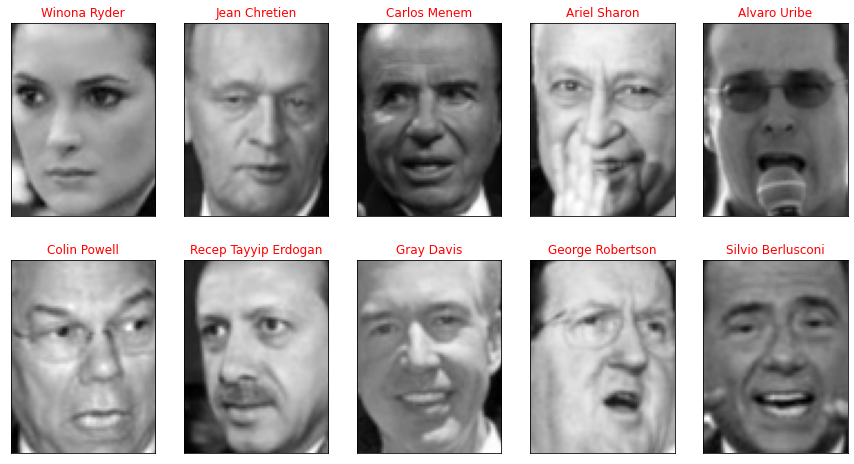

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target], color='red')

# Section 2 -- Dimensionality Reduction via PCA

In [3]:
print(f"{people.images.shape=}")
print(f"Number of classes: {len(people.target_names)}\n")

counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255

trainX, testX, trainY, testY = tts(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainX, trainY)

md(f"Test set score of 1-nn: $${knn.score(testX, testY)*100:.4f}\%$$")

people.images.shape=(3023, 87, 65)
Number of classes: 62

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jerem

Test set score of 1-nn: $$23.2558\%$$

## Create KNN functions

In [4]:
def SSD(trainX, testX):
    return ((trainX - testX) ** 2).sum(axis=1)

def KNN(trainX, testX, trainY):
    return np.take(trainY, SSD(trainX, testX).argmin())

def prediction(trainX, testX, trainY):
    return [KNN(trainX, test, trainY) for test in testX]

def accuracy(yhat, y):
    accuracy = np.where(yhat == y, 1, 0).mean() * 100
    return md(f'$$ Accuracy: {accuracy:.4f}\% $$')

accuracy(yhat=prediction(trainX, testX, trainY), y=testY)

$$ Accuracy: 23.2558\% $$

In [5]:
mean = trainX.mean(axis=0)
std = trainX.std(axis=0, ddof=1)
####################################################################
trainX_std = (trainX - mean) / std
testX_std = (testX - mean) / std
####################################################################

_ , s, vT = np.linalg.svd(trainX_std)
eigen_val = s**2 / (trainX_std.shape[0] - 1)
eigen_vec = vT.T

####################################################################

indices = np.arange(100)
dim_100_eigen_val = np.take(eigen_val, indices)
dim_100_eigen_vec = np.take(eigen_vec, indices, axis=1)
trainProj = trainX_std @ dim_100_eigen_vec
testProj = testX_std @ dim_100_eigen_vec

####################################################################

accuracy(yhat=prediction(trainProj, testProj, trainY), y=testY)

$$ Accuracy: 25.3876\% $$

In [6]:
topValuesDiag = np.diag(dim_100_eigen_val ** (-1/2))
trainWhitened = (topValuesDiag @ dim_100_eigen_vec.T @ trainX_std.T).T
testWhitened = (topValuesDiag @ dim_100_eigen_vec.T @ testX_std.T).T

accuracy(yhat=prediction(trainWhitened, testWhitened, trainY), y=testY)

$$ Accuracy: 33.1395\% $$

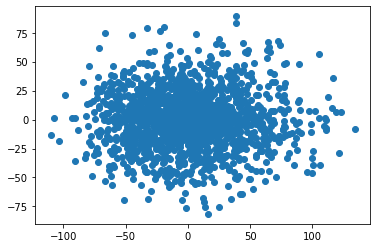

In [7]:
indices = np.arange(2)
best_two_eigen_vec = np.take(eigen_vec, indices, axis=1)
trainProj = trainX_std @ best_two_eigen_vec
plt.scatter(trainProj[:,0], trainProj[:,1])
plt.show()

# Section 3 -- Eigenfaces

people.images.shape=(3023, 87, 65)
Number of classes: 62

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jerem

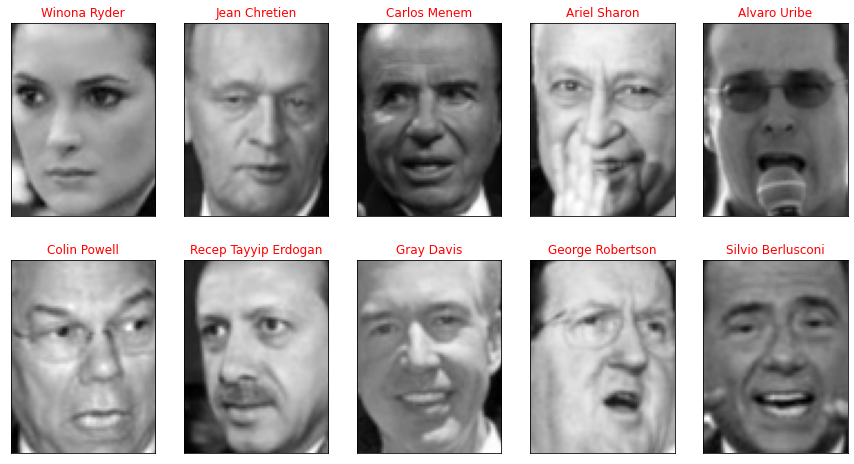

In [8]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown as md
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target], color='red')

print(f"{people.images.shape=}")
print(f"Number of classes: {len(people.target_names)}\n")

counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255

trainX, testX, trainY, testY = tts(X_people, y_people, stratify=y_people, random_state=0)

mean = trainX.mean(axis=0)
std = trainX.std(axis=0, ddof=1)
####################################################################
trainX_std = (trainX - mean) / std
testX_std = (testX - mean) / std
####################################################################

_ , s, vT = np.linalg.svd(trainX_std)
eigen_val = s**2 / (trainX_std.shape[0] - 1)
eigen_vec = vT.T

indices = np.arange(2)
best_two_eigen_vec = np.take(eigen_vec, indices, axis=1)
trainProj = trainX_std @ best_two_eigen_vec


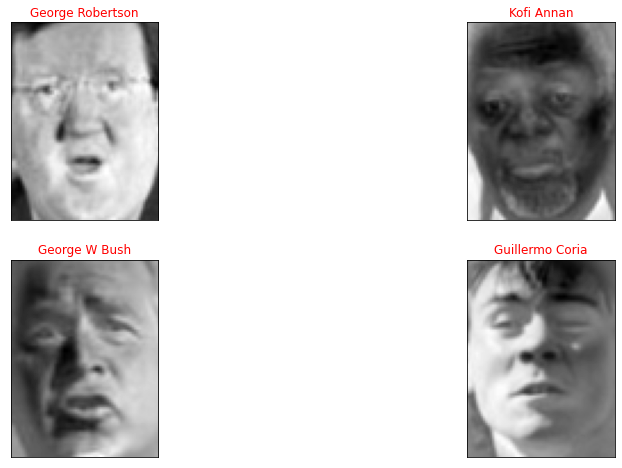

In [9]:
PC1 = np.take(trainProj, 0, axis=1)
PC2 = np.take(trainProj, 1, axis=1)

PC1_min_idx = PC1.argmin()
PC1_max_idx = PC1.argmax()
PC2_min_idx = PC2.argmin()
PC2_max_idx = PC2.argmax()



images = [np.take(trainX_std, PC1_min_idx, axis=0).reshape(87, 65),
    np.take(trainX_std, PC1_max_idx, axis=0).reshape(87, 65),
    np.take(trainX_std, PC2_min_idx, axis=0).reshape(87, 65),
    np.take(trainX_std, PC2_max_idx, axis=0).reshape(87, 65),
]


targets = [people.target_names[np.take(trainY, PC1_min_idx, axis=0)],
    people.target_names[np.take(trainY, PC1_max_idx, axis=0)],
    people.target_names[np.take(trainY, PC2_min_idx, axis=0)],
    people.target_names[np.take(trainY, PC2_max_idx, axis=0)],
]

fig, axes = plt.subplots(2, 2, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(targets, images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(target, color='red')

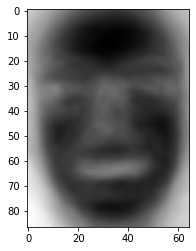

In [10]:
plt.imshow(best_two_eigen_vec[:,0].reshape(87,65), cmap=cm.gray)
plt.show()

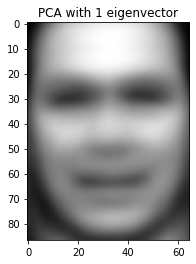

In [12]:
indices = [1]
reconstructionVec = np.take(eigen_vec, indices, axis=1)
reconstructedImg = trainX[0] @ reconstructionVec @ reconstructionVec.T
reconstructedImg = reconstructedImg * std + mean
plt.imshow(reconstructedImg.reshape(87, 65), cmap=cm.gray)
plt.title('PCA with 1 eigenvector')
plt.show()

In [13]:
k = 0
cumsum = np.cumsum(eigen_val)
total = cumsum[-1]
while (cumsum[k] / total <= .95):
    k += 1
print(f"Num of eigenvectors needed: {k}")

Num of eigenvectors needed: 188


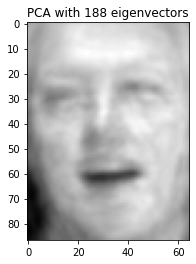

In [16]:
indices = np.arange(k)
reconstructionVec95 = eigen_vec[:,indices]
reconstructedImg95 = trainX[0] @ reconstructionVec95 @ reconstructionVec95.T
plt.imshow(reconstructedImg95.reshape(87, 65), cmap=cm.gray)
plt.title(f'PCA with {k} eigenvectors')
plt.show()